<IPython.core.display.Javascript object>


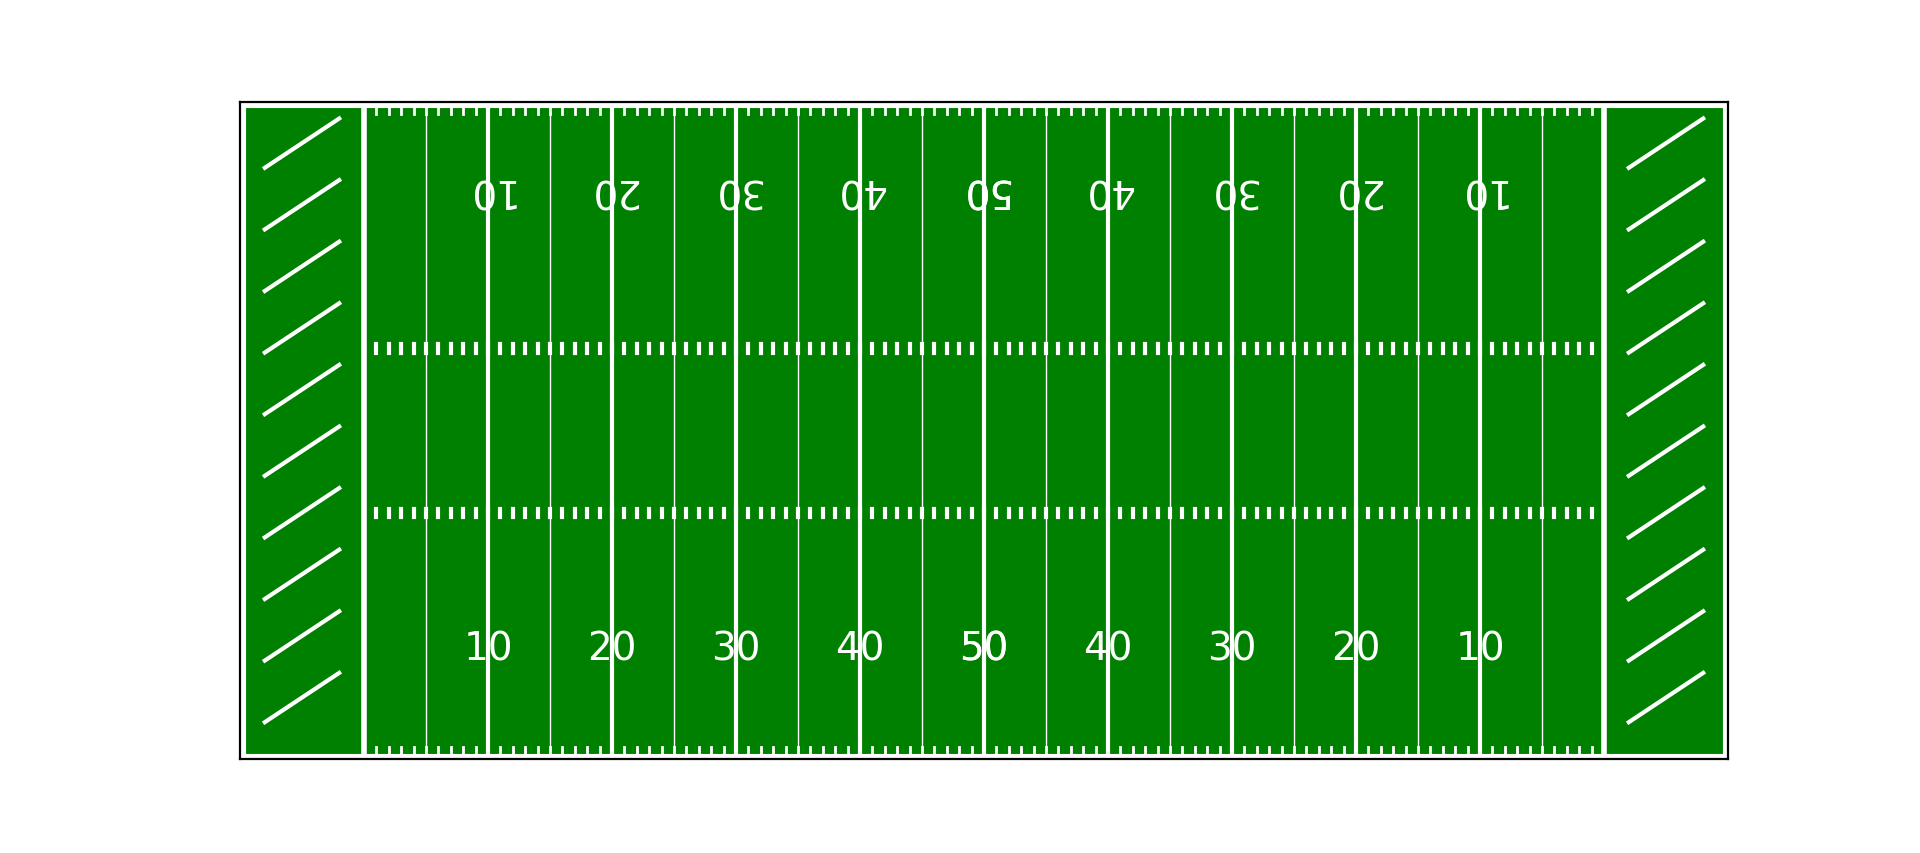

In [81]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fl = 120
fw = 53.33

fig, ax = plt.subplots(1,1, figsize=0.08*np.array([fl,fw]))
plt.tick_params(axis='y', which='both', left='off', labelleft='off')
plt.tick_params(axis='x', which='both', bottom='off', labelbottom='off')
ax.set_xlim(-10, 110)
ax.set_ylim(0, fw)
ax.set_facecolor('green')

# five yard lines
for x in range(5,105,10):
    plt.plot([x,x],[0,fw],'w',lw=0.5)

# ten yard lines
for x in range(0,110,10):
    plt.plot([x,x],[0,fw],'w',lw=1.5)

# goal lines
plt.plot([0,0], [0,fw], 'w', lw=2)
plt.plot([100,100], [0,fw], 'w', lw=2)

# hash marks
for x in range(0,101):
    plt.plot([x,x],[0,1],'w',lw=1)
    plt.plot([x,x],[fw,fw-1],'w',lw=1)
    plt.plot([x,x],[fw/2 + 19/3, fw/2 + 21/3], 'w')
    plt.plot([x,x],[fw/2 - 19/3, fw/2 - 21/3], 'w')

# yard numbering
for x in range(10,60,10):
    plt.text(x, 8, str(x), ha='center', color='white', size=14)
    plt.text(100-x, 8, str(x), ha='center', color='white', size=14)
    plt.text(x, fw-8, str(x), ha='center', color='white', size=14, rotation=180)
    plt.text(100-x, fw-8, str(x), ha='center', color='white', size=14, rotation=180)

# end zone hashing
for y in range(5,55,5):
    plt.plot([-8,-2],[y-2,y+2],'w')
    plt.plot([102,108],[y-2,y+2],'w')
    
# out of bounds lines
plt.plot([-10,fl-10,fl-10,-10,-10],[0,0,fw,fw,0],'w',lw=4)
   